In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

import copy

import wrangle

seed = 55

In [2]:
zillow = wrangle.get_zillow()

In [3]:
zillow = wrangle.drop_zill(zillow)

In [4]:
zillow.head()

,bed,bath,sqft,value,year,tax,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [5]:
# Splitting Data before scaling
train, val_test = train_test_split(zillow, train_size=0.7,
                                  random_state = seed)
val , test = train_test_split(val_test, train_size = 0.5,
                             random_state=seed)

In [6]:
train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [7]:
# copying train to compare

In [8]:
c_train = copy.deepcopy(train)

In [20]:
c_train.head()

,bed,bath,sqft,value,year,tax,fips
274677,3.0,2.0,2159.0,364577.0,1967.0,4517.62,6037.0
283102,2.0,1.0,1072.0,162390.0,1954.0,1996.96,6037.0
1088474,4.0,3.0,2643.0,189091.0,1971.0,2434.06,6037.0
2015167,3.0,1.0,1008.0,52554.0,1956.0,1276.09,6037.0
667420,4.0,3.5,3574.0,1057690.0,2007.0,20070.98,6111.0


## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

### MinMaxScaler

In [9]:
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [10]:
mms.fit(train[['sqft','value', 'tax']])
ss.fit(train[['sqft','value', 'tax']])
rs.fit(train[['sqft','value', 'tax']])

RobustScaler()

In [11]:
train[['sqft','value', 'tax']] = mms.transform(train[['sqft','value', 'tax']])

In [12]:
train.head()

,bed,bath,sqft,value,year,tax,fips
274677,3.0,2.0,0.002265,0.004142,1967.0,0.004288,6037.0
283102,2.0,1.0,0.001124,0.001845,1954.0,0.001892,6037.0
1088474,4.0,3.0,0.002774,0.002148,1971.0,0.002308,6037.0
2015167,3.0,1.0,0.001057,0.000597,1956.0,0.001207,6037.0
667420,4.0,3.5,0.003751,0.012016,2007.0,0.019072,6111.0


In [13]:
train[['sqft','value', 'tax']] = ss.transform(train[['sqft', 'value', 'tax']])

In [14]:
train[['sqft','value', 'tax']] = rs.transform(train[['sqft', 'value', 'tax']])

In [17]:
# comapares shape of orginal and scaled dataframes.
# must add df.collum
def compare_data(original ,scaled_col):
    
    plt.figure(figsize=(11,7))
    plt.subplot(1,2,1)
    sns.histplot(data=c_train, x=original, bins=30)

    plt.subplot(1,2,2)
    sns.histplot(data=train, x=scaled_col, bins=30)

    plt.show()

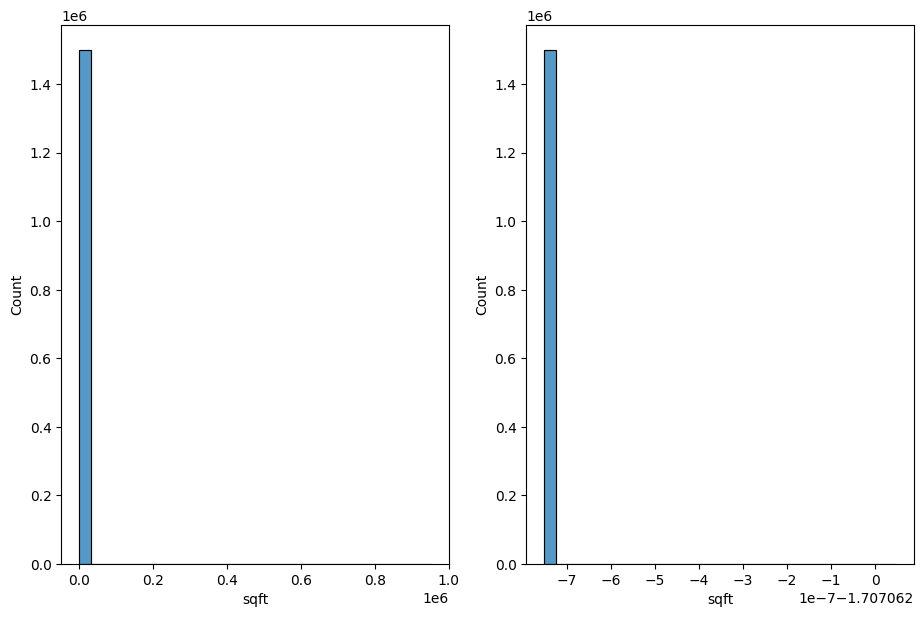

In [19]:
compare_data(c_train.sqft,train.sqft)

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [ ]:
qt = QuantileTransformer
qt.fit(train[['sqft','value', 'tax']])